<a href="https://colab.research.google.com/github/benasphy/Naive-bayes/blob/main/spam_detection_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.9

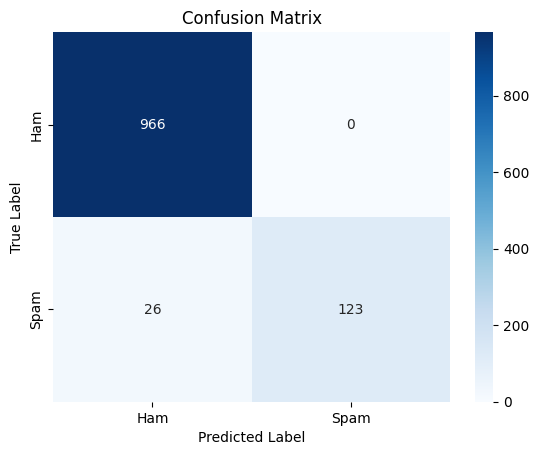

Message: Congratulations! You've won a free iPhone. Click here to claim your prize!
Predicted Label: Spam

Message: Hey, are we still meeting for lunch today?
Predicted Label: Ham

Message: URGENT: Your bank account has been compromised. Call this number immediately!
Predicted Label: Ham



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Display basic info and first few rows
data.info()
print(data.head())

# Drop unnecessary columns if present
data = data.iloc[:, :2]
data.columns = ['label', 'message']

# Encode labels (spam=1, ham=0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Split data into features and target
X = data['message']
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Function to test new messages
def predict_message(messages):
    messages_transformed = vectorizer.transform(messages)
    predictions = nb_model.predict(messages_transformed)
    for msg, pred in zip(messages, predictions):
        print(f'Message: {msg}\nPredicted Label: {"Spam" if pred == 1 else "Ham"}\n')

# Example test cases
new_messages = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize!",
    "Hey, are we still meeting for lunch today?",
    "URGENT: Your bank account has been compromised. Call this number immediately!"
]

predict_message(new_messages)